In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
from inputdatabuilder import InputDataBuilder
from hopfieldnetwork import HopfieldNetwork
%matplotlib inline

### Hopfield denoising with $n=3$ images

In [2]:
n = 3
path = "data/MPEG7_CE-Shape-1_Part_B"
fpaths = ["{}/{}".format(path, name) for name in os.listdir(path)[:n]]# if '.png' in name]
idb = InputDataBuilder(fpaths)

Images to load into Hopfield network:

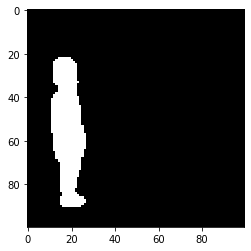

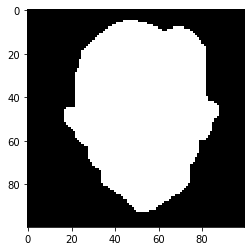

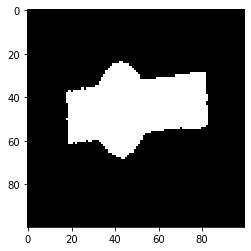

In [3]:
for img in idb.deserialize(display=True):
    plt.imshow(Image.fromarray(img), cmap='gray')
    plt.show()

### Train network

In [4]:
hn = HopfieldNetwork(n=np.prod(idb.size))
x = idb.X[0]
x[x==0] = -1

In [5]:
hn.update(x) # SLOW

[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


### Recall images

Noisy image to recall:

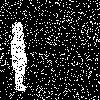

In [6]:
noisy_imgs = idb.get_salt_pepper_noisy_imgs()
Image.fromarray(noisy_imgs[0]*255)

In [7]:
# format for network
x_noisy = idb.get_salt_pepper_noisy_imgs()[0].flatten()
x_noisy = x_noisy.astype('int8')
x_noisy[x_noisy == 0] = -1

In [8]:
# recall image
x_recalled = hn.recall(x_noisy)

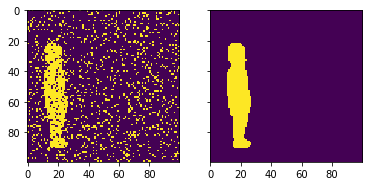

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(x_noisy.reshape(idb.size))
ax2.imshow(x_recalled.reshape(idb.size))

In [10]:
(InputDataBuilder._deserialize(x_recalled, (100, 100))==InputDataBuilder._deserialize(x, (100, 100))).all()

True

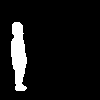

In [34]:
x = np.random.binomial(1, 0.5, (100, 100))
z = hn.recall(InputDataBuilder._serialize(x, (100, 100)))
Image.fromarray(InputDataBuilder._deserialize(z, (100, 100))*255)